(435742, 13)
                 so2            no2           rspm            spm        pm2_5
count  401096.000000  419509.000000  395520.000000  198355.000000  9314.000000
mean       10.829414      25.809623     108.832784     220.783480    40.791467
std        11.177187      18.503086      74.872430     151.395457    30.832525
min         0.000000       0.000000       0.000000       0.000000     3.000000
25%         5.000000      14.000000      56.000000     111.000000    24.000000
50%         8.000000      22.000000      90.000000     187.000000    32.000000
75%        13.700000      32.200000     142.000000     296.000000    46.000000
max       909.000000     876.000000    6307.033333    3380.000000   504.000000

__________________________________________

 number of non null values in each column

_________________________________________
stn_code                       291665
sampling_date                  435739
state                          435742
location                       4

<AxesSubplot:xlabel='state'>

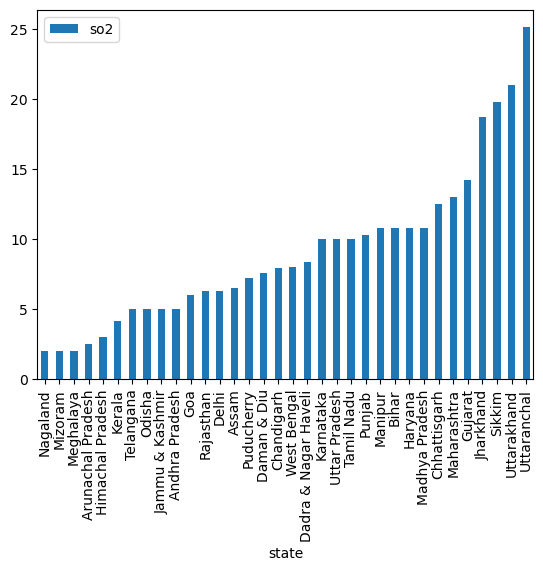

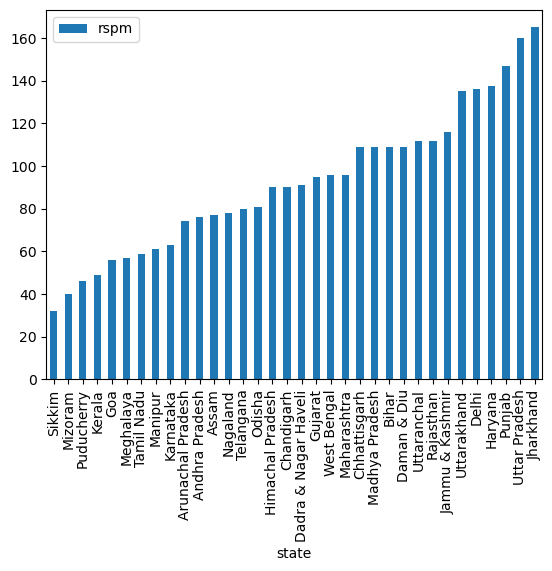

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

data = pd.read_csv('data.csv', encoding = "ISO-8859-1")

# It returns a number of rows and columns in a dataset.

print(data.shape)

print(data.describe())	

# It results in a number of non null values in each column.

print("\n__________________________________________")
print("\n number of non null values in each column")
print("\n_________________________________________")

print(data.count())

# It returns a number of null values in each column.

print("\n______________________________________")
print("\n number of null values in each column")
print("\n______________________________________")

print(data.isnull().sum())

# It returns range, column, number of non-null objects of each column, datatype and memory usage.

print("\n______________________________________")
print("\n returns range, column, number of non-null")
print("\n objects of each column, datatype and memory usage")
print("\n______________________________________")

print(data.info())


# Cleaning up the data

#dropping columns that aren't required

data.drop(['stn_code', 'agency', 'sampling_date', 'location_monitoring_station'], axis=1, inplace=True) 

print(data.columns)

data = data.dropna(subset=['date']) # dropping rows where no date is available

types = {
    "Residential": "R",
    "Residential and others": "RO",
    "Residential, Rural and other Areas": "RRO",
    "Industrial Area": "I",
    "Industrial Areas": "I",
    "Industrial": "I",
    "Sensitive Area": "S",
    "Sensitive Areas": "S",
    "Sensitive": "S",
    np.nan: "RRO"
}
data.type = data.type.replace(types)

print(data.head(5))

# defining columns of importance, which shall be used reguarly
COLS = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']

from sklearn.impute import SimpleImputer
# invoking SimpleImputer to fill missing values
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
data[COLS] = imp.fit_transform(data[COLS])

print("\n______________________________________")
print("\n repalced null values with its mean   ")
print("\n______________________________________")

print(data.head(5))
print("\n______________________________________")
print("\n Againg checking null values          ")
print("\n______________________________________")

print(data.isnull().sum())

# Statewise Grouping of rspm, spm, no2 values	

statewise_so2 = data[['so2','state']].groupby('state', as_index=False).median().sort_values(by='so2')
print("\n______________________________________")
print(statewise_so2.head(10))

statewise_so2.plot(kind='bar',x='state',y='so2')

# no2 status

state_wise_rspm = data[['rspm','state']].groupby('state', as_index=False).median().sort_values(by='rspm')
print("\n______________________________________")
print(state_wise_rspm.head(5))
print("\n______________________________________")
state_wise_rspm.plot(kind='bar',x='state',y='rspm')
